<h1> Heart Disease and its Telling Signs </h1>
<p> DASC 2113 Principles and Techniques Final </p>
<p> Abby Willard, Braden Fowler, Bobby Slavins </p>

<h2> Background </h2>
<p>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. ⅘ of CVD deaths are due to heart attacks and strokes, and ⅓  of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease need early detection and management wherein a machine learning model can be of great help to indicate key factors of heart disease.</p>

<h3> Dataset Background </h3>
<p> The Heart Failure Prediction Dataset is a conglomoerate dataset of indepenent pre-existing datasets. The datasets were combined over their 11 common features. The sources of the conglomoerate datasets that capture the data are:</p>
    <ul>
        <li>Cleveland: 303 Observations </li>
        <li> Hungarian: 294 Observations </li> 
        <li> Switzerland: 123 Observations </li>
        <li> Long Beach VA: 200 Observations </li>
        <li> Stalog Heart Data Set: 270 Observations </li>
    </ul>
<p>The final dataset had 918 observations (272 observations were repeated from the 1190 total observations) aswell as 12 attributes</p>
<p> <h4>The 12 attributes include the following</h4></p>
 <ul>
        <li>Age:int, ranging from 28-77 </li>
        <li> Sex:char,[M: Male, F: Female]</li> 
        <li> Chest Pain Type:string, 4 Types </li>
                <ul> <li> Typical Angina </li>
                <li> Atypical Angina </li>
                <li> Non-Anginal Pain </li>
                <li> Asymptomatic </li> </ul>  
        <li> Resting Blood Pressure: int ranging from 80-200 </li>
        <li> Cholesterol: int ranging from 0-400</li>
        <li>Fasting Blood Sugar:bool, 1: if FastingBS > 120, 0: if otherwise </li>
        <li> Resting ECG: string, resting ECG results: Normal, LVH,  ST </li> 
        <li> Max Heart Rate:int ranging between 60-202 </li>
        <li> Exercise Angina: exercise-induced Angina [Y: Yes, N: No] </li> 
        <li> Oldpeak: int, ranging between -2.6-6.2</li>
        <li> ST_Slope: The slope of the peak exercise ST segment</li> 
                <ul> <li> Up: upsloping </li>
                    <li> Flat: flat slope </li>
                    <li> Down: Downsloping </li>
               </ul>
        <li> Heart Disease: output class [1: heart disease positive, 0: Normal heart]</li>
    </ul> 


<h2> Introduction </h2>
<p> With the magnitude of how deadly heart disease is, and how it occurs prematurely with individuals under 70 in many cases, what, if any, are indicators to help pre diagnose individuals who share attributes with those who have experienced CVD? </p>

<p>It is our goal to determine how the above attributes correlate with heart disease, determine if those findings are significant, and create a prediction to evaluate ones's risk of heart disease based on their attributes values using correlation calculations, decision tree classifications, and logistic regression model. </p>

<h2> Exploratory Method </h2>
<p> Our exploratory work will be broken down into 2 sections</p>
<ul> <li> Exploratory Data Analysis </li>
    <li> Exploratory Interpretation</li> </ul>

<h3> Exploratory Data Analysis </h3>
<p> Within our exploratory data analysis (EDA), we want to get a general understanding of the dataset and the variables alike </p>

<h4> Loading in the data </h4>

In [2]:
# Importing the packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import math
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import random
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
from scipy import stats
from itertools import groupby

In [6]:
# Load CSV file as pandas dataframe
heart_csv = pd.read_csv("heart.csv")

<h4> Exploring the Data </h4>

In [7]:
#this gives the descriptive statistics for all of the following qualitative variables 
#the describe function gives a lot of information about the variables in interest.
heart_csv.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


1    508
0    410
Name: HeartDisease, dtype: int64


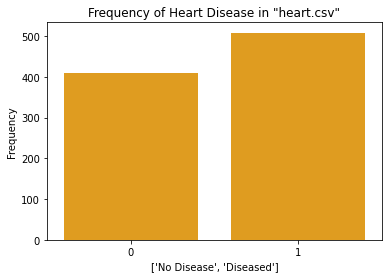

In [9]:
# Create a countplot to show the amount of people with and without heart disease

countplot = sns.countplot(x='HeartDisease', data=heart_csv, color="Orange")
countplot.set_title('Frequency of Heart Disease in "heart.csv"')
countplot.set_xlabel(['No Disease', 'Diseased'])
countplot.set_ylabel('Frequency')

print(heart_csv['HeartDisease'].value_counts())

<p> The above graph indicates that 508 individuals within this dataset are positive for heart disease and 410 have a normal heart. Having almost equal showing for both will help us later analyze both sides of the spectrum </p>

<h4> Age Variable Analysis</h4> 
<p> Just with minimal background, we know there is some correlation with being older and having heart disease. So that was one of the first variables we wanted to investigate. </p>

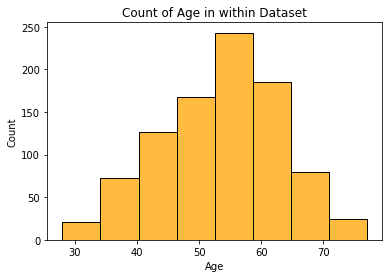

In [112]:
# Create a histogram of ages in dataset for EDA
age_hist_plot = sns.histplot(x="Age", data=heart_csv, bins=8, color="Orange")
age_hist_plot.set_title('Count of Age in within Dataset')
plt.savefig('graphics/agecount.png')

          HeartDisease
Age                   
(20, 30]      0.000000
(30, 40]      0.363636
(40, 50]      0.417040
(50, 60]      0.582677
(60, 70]      0.736041
(70, 80]      0.666667


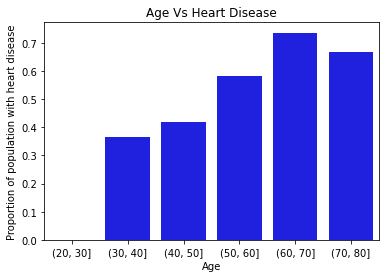

In [15]:
# Groups Age from 20 to 90 by an increment of 10 and takes the mean of all the HeartDisease values in each group
heart_age_df = heart_csv.groupby(pd.cut(heart_csv["Age"], np.arange(20, 90, 10))).mean()
print(heart_age_df[["HeartDisease"]])

# Creates a barplot of the Age groups on the x-axis and the mean HeartDisease on the y-axis
heart_age_plot = sns.barplot(x = heart_age_df.index, y = "HeartDisease", data = heart_age_df, color = "blue")

heart_age_plot.axes.set_title("Age Vs Heart Disease")

plt.xlabel("Age")
plt.ylabel("Proportion of population with heart disease")
plt.show()

<h5> Age Histograms </h5>
<p> The above two graphs visualize age from different perspectives. The first histogram indicates that there is an almost normal distribution of ages within the dataset, creating a peak age around 55. The second histogram indicates the common ages of individuals who are heart disease positive, visualizing it in 10 year groupings. The histogram is skewed left with the peak being at 60,70, indicating that most positive heart disease patients lie that age bracket. </p>

<h4> Restig Blood Pressure Analysis</h4> 

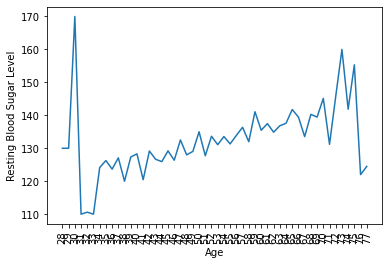

In [18]:
pivot_BP = heart_csv.pivot_table(values="RestingBP", index="Age", aggfunc=[np.sum, np.mean, np.min, np.max, np.std])
pivot_BP

#pulls out the mean resing blood pressure level, and shows the relationship between the index aka Age
plt.plot(pivot_BP.index, pivot_BP["mean"])
plt.xticks(pivot_BP.index, rotation=90)
plt.xlabel("Age")
plt.ylabel("Resting Blood Sugar Level")
plt.show()

            HeartDisease
RestingBP               
(60, 90]        0.000000
(90, 120]       0.487973
(120, 150]      0.559055
(150, 180]      0.678899
(180, 210]      0.875000


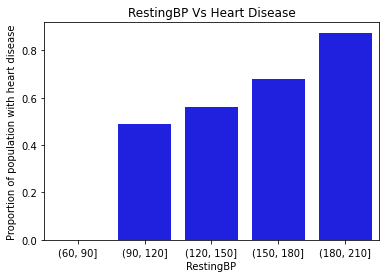

In [19]:
# Groups RestingBP from 60 to 240 by an increment of 30 and takes the mean of all the HeartDisease values in each group
heart_RestingBP_df = heart_csv.groupby(pd.cut(heart_csv["RestingBP"], np.arange(60, 240, 30))).mean()
print(heart_RestingBP_df[["HeartDisease"]])

# Creates a barplot of the RestingBP groups on the x-axis and the mean HeartDisease on the y-axis
heart_RestingBP_plot = sns.barplot(x = heart_RestingBP_df.index, y = "HeartDisease", data = heart_RestingBP_df, color = "blue")

heart_RestingBP_plot.axes.set_title("RestingBP Vs Heart Disease")

plt.xlabel("RestingBP")
plt.ylabel("Proportion of population with heart disease")
plt.show()

<p> The above two visualizations are very telling of the data. Age and resting blood pressure have an positive linear correlation and as do resting blood pressure and heart disease. We determined above that age and heart disease were also a linear correlation with having positive heart disease, so these findings are accurate </p>

<h4> Max Heart Rate Analysis</h4> 

            HeartDisease
MaxHR                   
(50, 80]        0.846154
(80, 110]       0.807407
(110, 140]      0.656593
(140, 170]      0.420886
(170, 200]      0.179775


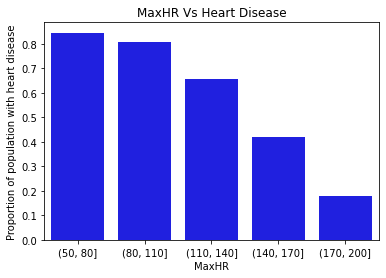

In [40]:
# Groups MaxHR from 50 to 230 by an increment of 30 and takes the mean of all the HeartDisease values in each group
heart_MaxHR_df = heart_csv.groupby(pd.cut(heart_csv["MaxHR"], np.arange(50, 230, 30))).mean()
print(heart_MaxHR_df[["HeartDisease"]])

# Creates a barplot of the MaxHR groups on the x-axis and the mean HeartDisease on the y-axis
heart_MaxHR_plot = sns.barplot(x = heart_MaxHR_df.index, y = "HeartDisease", data = heart_MaxHR_df, color = "blue")

heart_MaxHR_plot.axes.set_title("MaxHR Vs Heart Disease")

plt.xlabel("MaxHR")
plt.ylabel("Proportion of population with heart disease")
plt.show()

<p>The model above shows the heart rate decreases, the proportion of individuals with heart disease increases </p>

<h4> Old Peak Analysis </h4>

            HeartDisease
Oldpeak                 
(0.0, 0.5]      0.337662
(0.5, 1.0]      0.629921
(1.0, 1.5]      0.747748
(1.5, 2.0]      0.778689
(2.0, 2.5]      0.896552
(2.5, 3.0]      0.906977
(3.0, 3.5]      0.875000
(3.5, 4.0]      1.000000
(4.0, 4.5]      0.666667
(4.5, 5.0]      1.000000


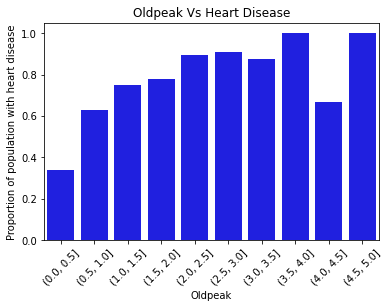

In [41]:
# Groups Oldpeak from 0 to 5.5 by an increment of .5 and takes the mean of all the values in each group
heart_Oldpeak_df = heart_csv.groupby(pd.cut(heart_csv["Oldpeak"], np.arange(0, 5.5, .5))).mean()
print(heart_Oldpeak_df[["HeartDisease"]])

# Creates a barplot of the Oldpeak groups on the x-axis and the mean HeartDisease on the y-axis
heart_Oldpeak_plot = sns.barplot(x = heart_Oldpeak_df.index, y = "HeartDisease", data = heart_Oldpeak_df, color = "blue")

heart_Oldpeak_plot.axes.set_title("Oldpeak Vs Heart Disease")

plt.xticks(rotation=45)
plt.xlabel("Oldpeak")
plt.ylabel("Proportion of population with heart disease")
plt.show()

Text(0.5, 1.0, 'Old Peak by Age hued on Heart Disease')

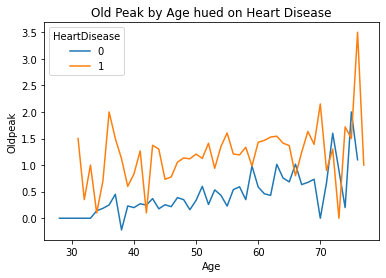

In [42]:
# Create line graph to show differences in Old peak between individuals with and without Heart Disease

heart_line = sns.lineplot(data=heart_csv, x='Age',y='Oldpeak', hue='HeartDisease', ci=None)
heart_line.set_title("Old Peak by Age hued on Heart Disease")

<p>It appears that the individuals with heart disease has a higher oldpeak value that those who do not have heart disease.</p>

<h4> Sexes variable </h4>
<p> To understand if either sex has greater ratio of having heart disease, we evaluated the sexes </p>

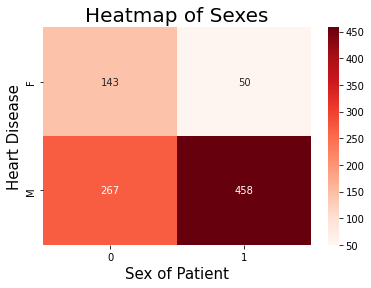

In [99]:
#creating cross tab to form heatmap 
#showing sex with Heart Disease
heat_sex = pd.crosstab(heart_csv['Sex'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')

#heat map of sexes with heart disease
sns.heatmap(heat_sex,annot=True, cmap= 'Reds',fmt='g')
#labels for heatmap
plt.title('Heatmap of Sexes', fontsize = 20) # title with fontsize 20
plt.xlabel('Sex of Patient', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Heart Disease', fontsize = 15) # y-axis label with fontsize 15
plt.savefig('graphics/heatmapsex.png')

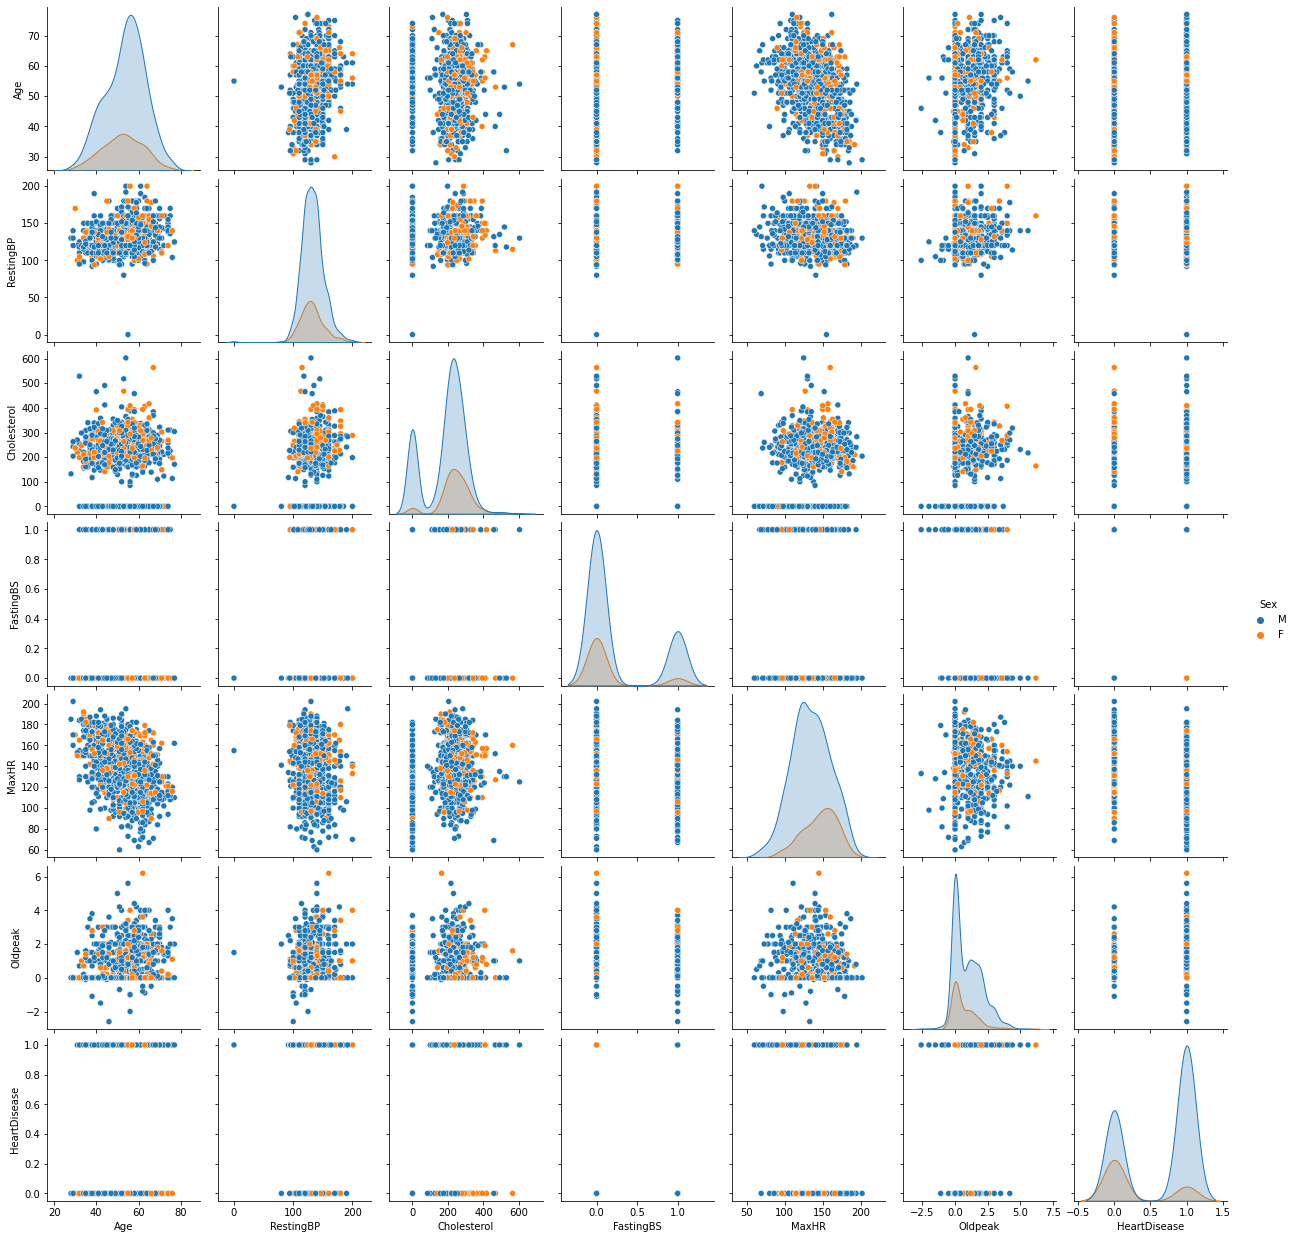

In [97]:
#pairplots create a whole view of how each variable relate to one another. 
#Here, I show how each of types of sexes are displayed with the rest of the variables. 
sns.pairplot(heart_csv, hue='Sex')

plt.savefig('graphics/pairplotsex.png')

In [44]:
# The values of the HeartDisease column are 1 and 0, with 1 being a positive case of heart disease and 0 being
# negative for heart disease. Therefore, we can get the proportion of heart disease for different populations by
# taking the average of HeartDisease for each population.
# Proportion of men with heart disease
heart_M_count = heart_csv[(heart_csv["Sex"] == "M")]["HeartDisease"].mean()
print(heart_M_count)
# Proportion of women with heart disease
heart_F_count = heart_csv[(heart_csv["Sex"] == "F")]["HeartDisease"].mean()
print(heart_F_count)

0.6317241379310344
0.25906735751295334


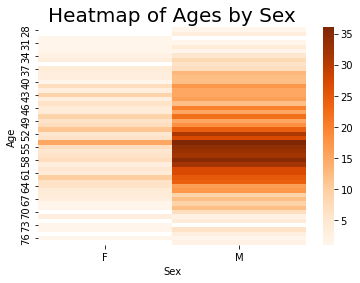

In [102]:
# Create heatmap to show which age range and gender is most likely to have heart disease by count function
# Create a crossmap in order to create a heatmap

heart_ct = pd.crosstab(heart_csv['Age'], heart_csv['Sex'], values=heart_csv['HeartDisease'], aggfunc='count')
heart_heat = sns.heatmap(heart_ct, cmap="Oranges")

plt.title('Heatmap of Ages by Sex', fontsize = 20)
plt.savefig('graphics/agesexheatmap.png')

<p> The above plots show that there is a skewed number of men and women in the dataset. Specifically, men have a way higher chance of having heart disease, and of the men who are apart of this dataset, 63% have heart disease, whereas the women of this dataset only 26% have heart disease. Moreover, men in their early to late 50s appear to have such disease.</p>

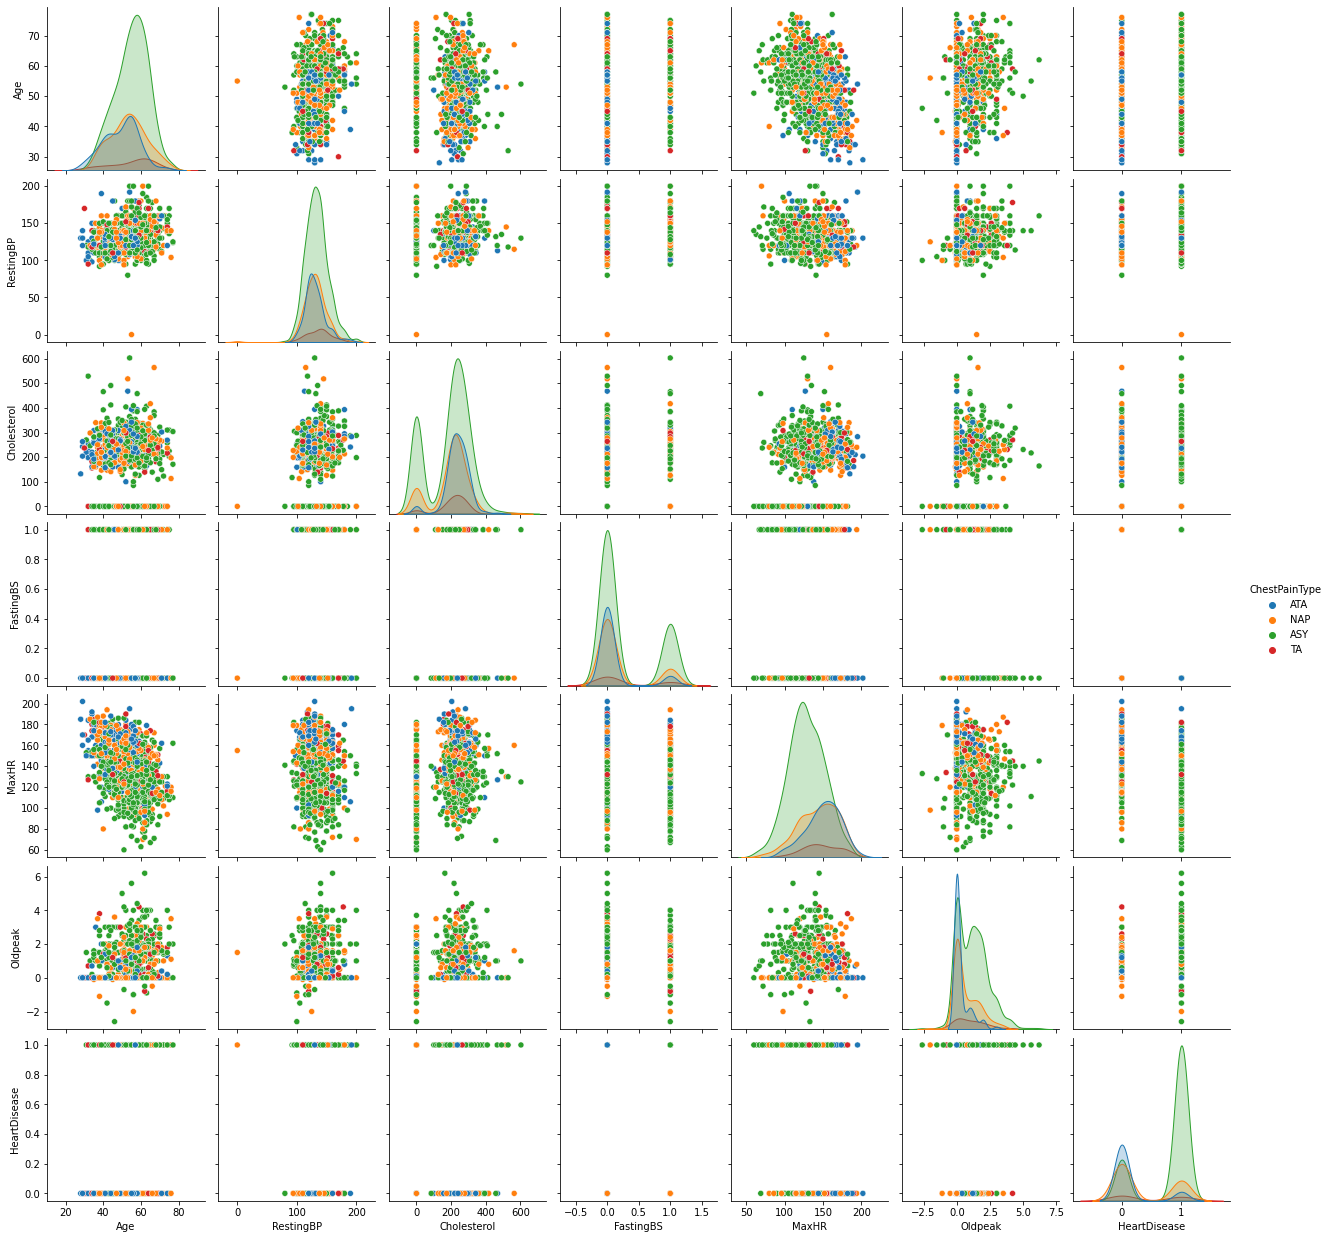

In [98]:
#pairplots create a whole view of how each variable relate to one another. 
#Here, I show how each of types of chest pain are displayed with the rest of the variables. 
sns.pairplot(heart_csv, hue='ChestPainType')
plt.savefig('graphics/pairplotpain.png')

<h4> Chest Pain Type Analysis </h4>
The majority of our patients appear to have asymptomatic pain, meaning that their is very little or no chest pain. </p>

<h4> Cholesterol Analysis </h4>

             HeartDisease
Cholesterol              
(50, 100]        0.333333
(100, 150]       0.529412
(150, 200]       0.376923
(200, 250]       0.446735
(250, 300]       0.554455
(300, 350]       0.526316
(350, 400]       0.500000
(400, 450]       0.600000


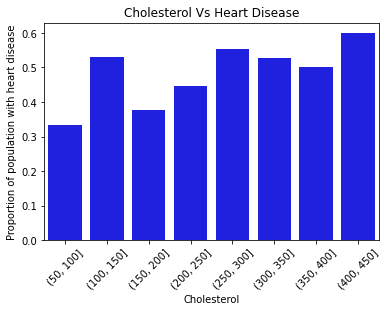

In [48]:
# Groups Cholesterol from 50 to 500 by an increment of 50 and takes the mean of all the values in each group
heart_cholesterol_df = heart_csv.groupby(pd.cut(heart_csv["Cholesterol"], np.arange(50, 500, 50))).mean()
print(heart_cholesterol_df[["HeartDisease"]])

# Creates a barplot of the Cholesterol groups on the x-axis and the mean HeartDisease on the y-axis
heart_cholesterol_plot = sns.barplot(x = heart_cholesterol_df.index, y = "HeartDisease", data = heart_cholesterol_df, color = "blue")

heart_cholesterol_plot.axes.set_title("Cholesterol Vs Heart Disease")

plt.xticks(rotation=45)
plt.xlabel("Cholesterol")
plt.ylabel("Proportion of population with heart disease")
plt.show()

There appears to be no correlation between cholesterol level and heart disease. A good distinction to make as to not waste time on analyzing it further 

<h3> Exploratory Interpretation </h3>

<p> from the heatmaps and EDA above, we can determine that many individuals with heart disease have the following traits.</p>
 
<ul>
    <li> 
        Mostly male </li>
    <li>
        Older individuals </li>
    <li> Lower heart rate </li>
    <li> Distinct old peak value </li>
    </ul>
 <p> To determine if these traits are significant, we will perform statistical Hypothesis tests to evaluate if the p value is significant or not</p>

<h4>Hypothesis Test for Sex </h4>
<p> Null Hypothesis: The male mean of heart disease is equal to that of female heart disease mean.  </p>
<p> Alternative Hypothesis: The male mean of heart disease is not equal to that of female heart disease mean.  </p>

In [51]:
# Start by subsetting the data for the values
#that are needed in order to perform hypothesis test

#subsetting the male population
male_hd = heart_csv[heart_csv['Sex'] == 'M']
male_hd_mean = np.mean(male_hd['HeartDisease'] == 1)
male_hd_std = np.std(male_hd['HeartDisease'] == 1)

#subsetting the female population 
female_hd = heart_csv[heart_csv['Sex'] == 'F']
female_hd_mean = np.mean(female_hd['HeartDisease'] == 1)
female_hd_std = np.std(female_hd['HeartDisease'] == 1)

# Perform Hypothesis Test for Sex
tset, pval = ttest_ind(male_hd['HeartDisease'], female_hd['HeartDisease'])

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Result: Because the p-value of ",pval, " is less than 0.05, we are REJECTING null hypothesis.")
else:
   print("Result: Because the p-value of ",pval,  " is greater than 0.05, we are ACCEPTING null hypothesis.")

Result: Because the p-value of  2.8218978236832174e-21  is less than 0.05, we are REJECTING null hypothesis.


<h4>Hypothesis Test for Ages </h4>
<p> Null Hypothesis: There is a correlation between Age and whether an individual develops Heart Disease.  </p>
<p> Alternative Hypothesis: There is no correlation between Age and whether an individual develops Heart Disease.  </p>

In [53]:
#subsetting the heart disease negative population
age_hd = heart_csv[heart_csv['HeartDisease'] == 0]
age_hd_mean = np.mean(age_hd['Age'])
age_hd_std = np.std(age_hd['Age'])

#subsetting the heart disease positive population
age_hd1 = heart_csv[heart_csv['HeartDisease'] == 1]
age_hd1_mean = np.mean(age_hd1['Age'])
age_hd1_std = np.std(age_hd1['Age'])

# Perform Hypothesis Test for Age
tset, pval = ttest_ind(heart_csv[(heart_csv['HeartDisease'] == 1)]['Age'], heart_csv[(heart_csv['HeartDisease'] == 0)]['Age'])

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Result: Because the p-value of ",pval, " is less than 0.05, we are REJECTING null hypothesis.")
else:
   print("Result: Because the p-value of ",pval,  " is greater than 0.05, we are ACCEPTING null hypothesis.")


Result: Because the p-value of  3.0079532400497047e-18  is less than 0.05, we are REJECTING null hypothesis.


<h4> Max heart rate </h4>
<p> Null Hypothesis: Mean heart rate of individuals with heart disease is the same as mean heart rate of individuals without heart disease </p>
<p> Alternative Hypothesis: Mean heart rate of individuals with heart disease is not the same as mean heart rate of individuals without heart disease </p>

In [56]:
# Calculate the mean heart rate for individuals with heart disease and individuals without heart disease
MaxHR_Disease_mean = np.mean(heart_csv[(heart_csv["HeartDisease"] == 1)]["MaxHR"])
MaxHR_No_Disease_mean = np.mean(heart_csv[(heart_csv["HeartDisease"] == 0)]["MaxHR"])

print("Mean Max Heart Rate Of Individuals with heart disease: ", MaxHR_Disease_mean)
print("Mean Max Heart Rate Of Individuals without heart disease: ", MaxHR_No_Disease_mean)

# Calculate the standard deviation of heart rate for individuals with heart disease and individuals without heart disease
MaxHR_Disease_standard_deviation = np.std(heart_csv[(heart_csv["HeartDisease"] == 1)]["MaxHR"])
MaxHR_No_Disease_standard_deviation = np.std(heart_csv[(heart_csv["HeartDisease"] == 0)]["MaxHR"])

print("Standard Deviation Max Heart Rate Of Individuals with heart disease: ",MaxHR_Disease_standard_deviation)
print("Standard Deviation Max Heart Rate Of Individuals without heart disease: ",MaxHR_No_Disease_standard_deviation)

# Hypothesis test
tset, pval = ttest_ind(heart_csv[(heart_csv["HeartDisease"] == 1)]["MaxHR"], heart_csv[(heart_csv["HeartDisease"] == 0)]["MaxHR"])
print("p-values: ",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
   print("we are accepting null hypothesis")

Mean Max Heart Rate Of Individuals with heart disease:  127.65551181102362
Mean Max Heart Rate Of Individuals without heart disease:  148.15121951219513
Standard Deviation Max Heart Rate Of Individuals with heart disease:  23.363892769998127
Standard Deviation Max Heart Rate Of Individuals without heart disease:  23.259649159017744
p-values:  1.1377859840278095e-36
we are rejecting null hypothesis


<h4> Old Peak </h4>
<p>Null Hypothesis: Mean Oldpeak of individuals with heart disease is the same as mean Oldpeak of individuals without heart disease</p>
<p>Alternative Hypothesis: Mean Oldpeak of individuals with heart disease is not the same as mean Oldpeak of individuals without heart disease</p>

In [57]:

# Calculate the mean oldpeak for individuals with heart disease and individuals without heart disease
Oldpeak_Disease_mean = np.mean(heart_csv[(heart_csv["HeartDisease"] == 1)]["Oldpeak"])
Oldpeak_No_Disease_mean = np.mean(heart_csv[(heart_csv["HeartDisease"] == 0)]["Oldpeak"])

print("Mean Oldpeak Of Individuals with heart disease: ", Oldpeak_Disease_mean)
print("Mean Oldpeak Of Individuals without heart disease: ", Oldpeak_No_Disease_mean)

# Calculate the standard deviation of Oldpeak for individuals with heart disease and individuals without heart disease
Oldpeak_Disease_standard_deviation = np.std(heart_csv[(heart_csv["HeartDisease"] == 1)]["Oldpeak"])
Oldpeak_No_Disease_standard_deviation = np.std(heart_csv[(heart_csv["HeartDisease"] == 0)]["Oldpeak"])

print("Standard Deviation Oldpeak Of Individuals with heart disease: ",Oldpeak_Disease_standard_deviation)
print("Standard Deviation Oldpeak Of Individuals without heart disease: ",Oldpeak_No_Disease_standard_deviation)

# Hypothesis test
tset, pval = ttest_ind(heart_csv[(heart_csv["HeartDisease"] == 1)]["Oldpeak"], heart_csv[(heart_csv["HeartDisease"] == 0)]["Oldpeak"])
print("p-values: ",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
   print("we are accepting null hypothesis")

Mean Oldpeak Of Individuals with heart disease:  1.2742125984251969
Mean Oldpeak Of Individuals without heart disease:  0.4080487804878049
Standard Deviation Oldpeak Of Individuals with heart disease:  1.1507376828123903
Standard Deviation Oldpeak Of Individuals without heart disease:  0.6988552294766102
p-values:  2.3907724240589574e-37
we are rejecting null hypothesis


<p> From the hypothesis tests created above, we determined that the difference in means are statistically significant with an alpha level of 0.05. Therefore, sex, age, max heart rate, and oldpeak are all variables to look at when determining if one is more or less likely to have heart disease </p>

<h2> Predictive Method </h2>
<p> Our predictive work will be broken down into 2 sections</p>
<ul> <li> Predictive Measures </li>
    <li> Predictive Interpretation</li> </ul>

<h3> Predictive Measures </h3>
<p> Within our predictive measures, we want to determine if there are variables that can be used to predict if one has a high chance of having heart disease or not. After each of our predictvie measures, we will test whether the model is accurate or not by many checks: confusion matrix, accuracy scores, and classification reports. </p>

In [58]:
#importing packages that will be needed for decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importtrain_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [60]:
#loading in the data using pandas
heart = pd.read_csv("heart.csv")

<h4>Decision Tree </h4>


<h5>Feature Selection </h5>

We divide the given columns into two types of variables: target variables or dependent and feature variables that are independent.

In [61]:
#split dataset in features and target variable
feature_cols = ['MaxHR','Age','RestingBP', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable

<h5> Splitting the Data </h5>
<p> To understand the model performance, dividing the dataset into training set and a test set is a good strategy</p>
<p> To do so, use the function train_test_splot() from the sklearn package </p>
<p> for this function to work, you need to pass 3 parameters: features, target and test_set size </p>

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

<h5> Building the Decision Tree Model </h5>
<p> using sklearn package, create the decision tree model </p>

In [63]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

<h5> Evaluating Model </h5>
<p>lets estimate, how accurately the classifier or model can predict the type of cultivar. </p>
<p> Here, we are computing accuracy by comparing actual test set values and predicted values </p>

In [64]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6992753623188406


<p> An accuracy of high 60-70 is considered a good accuracy. This accuracy will be improved tuning the parameters in the decision tree </p>

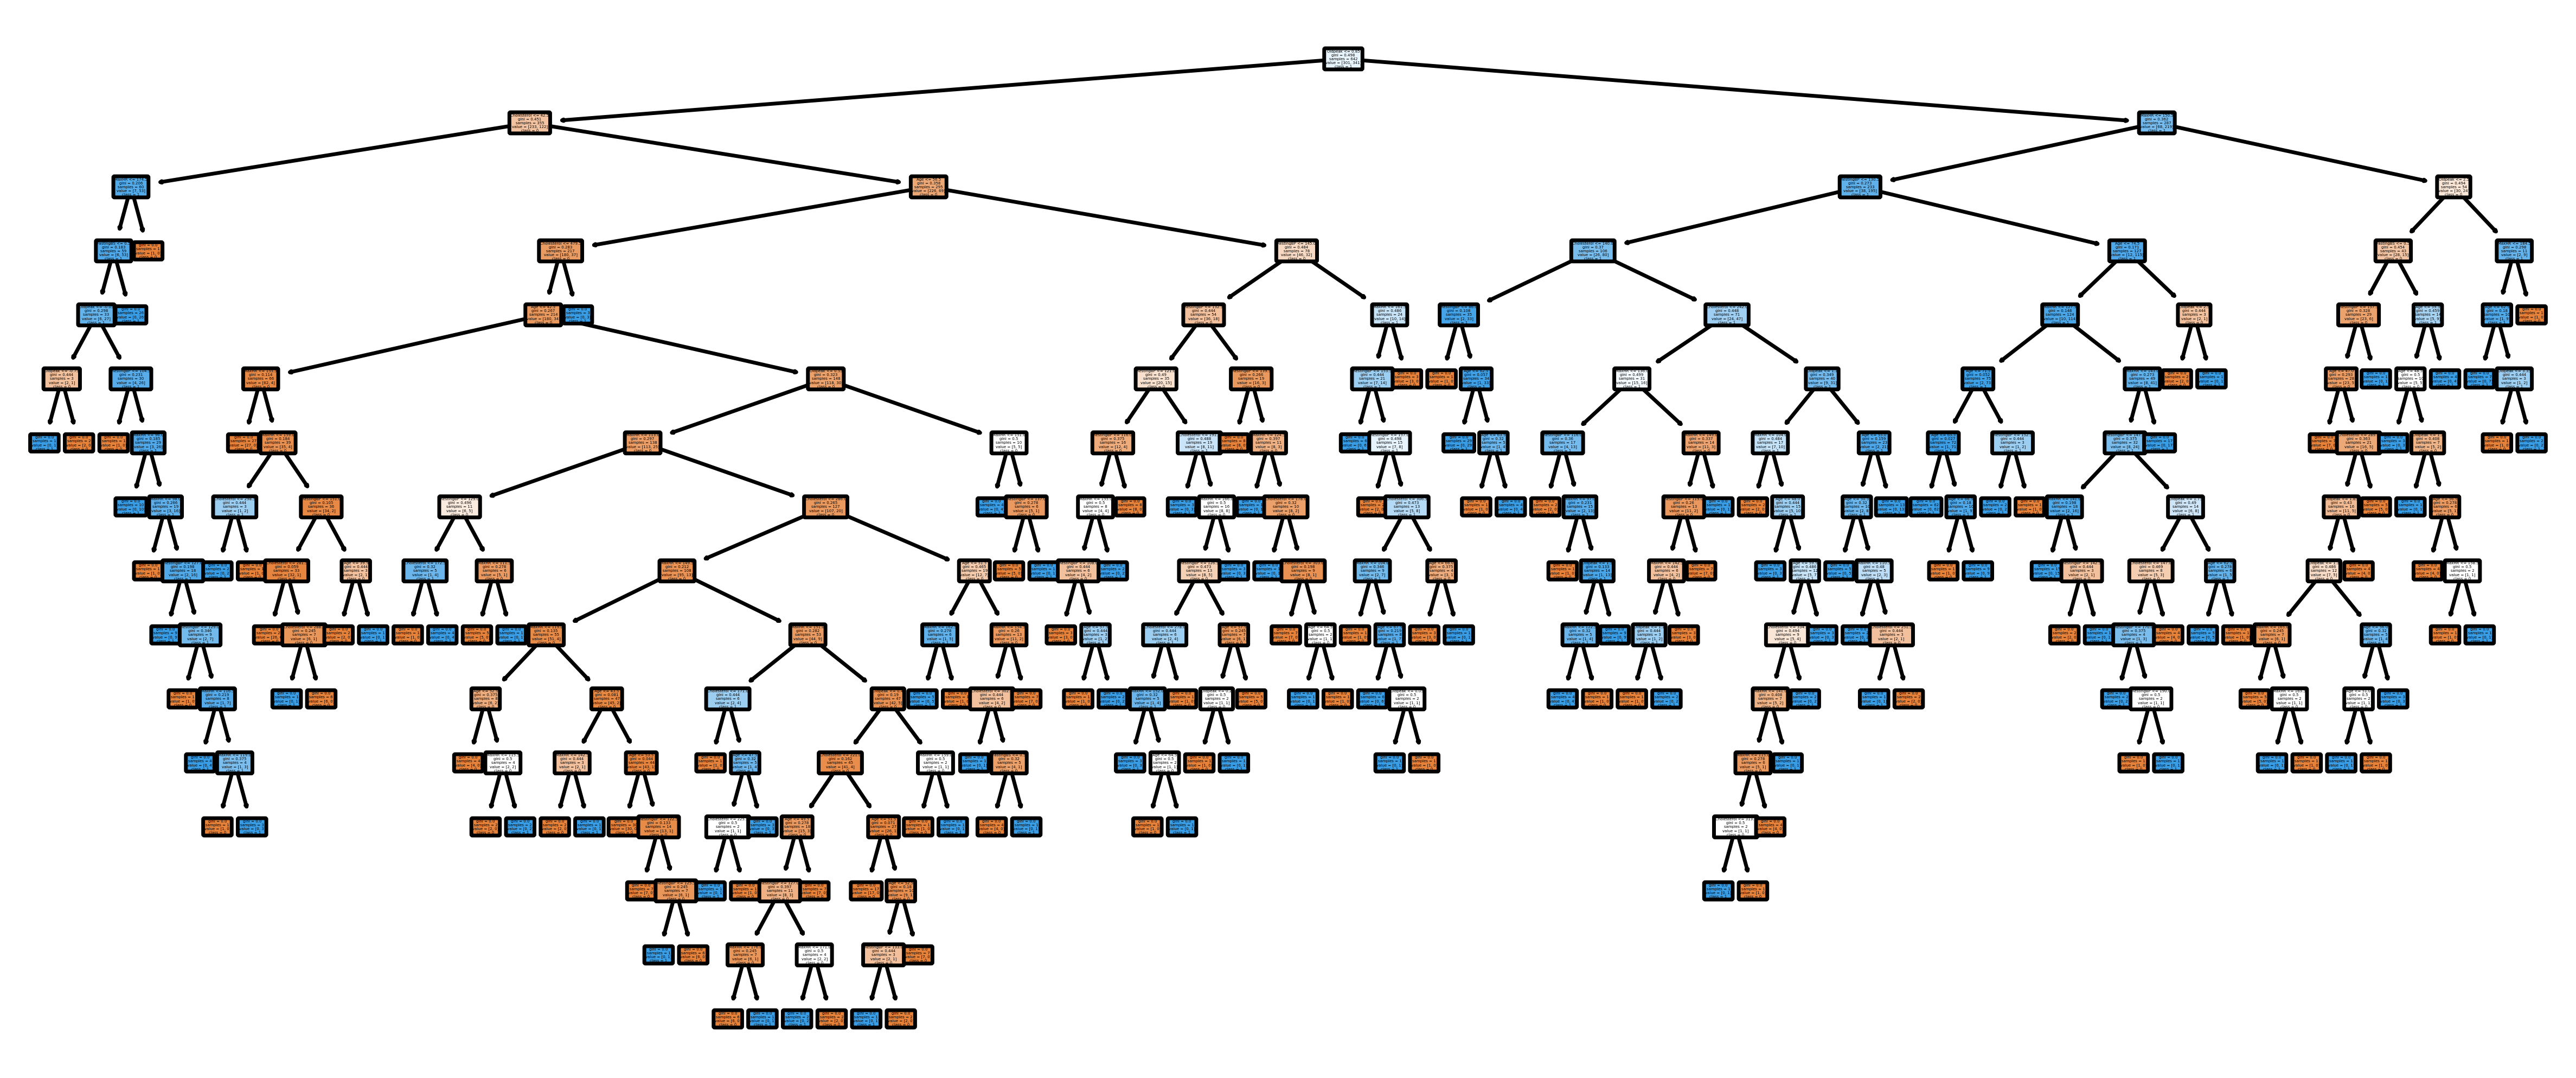

In [67]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('graphics/dectree.png')

<p>Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.</p>
<h4> Optimizing Decision Tree Performance </h4>

In [68]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8007246376811594


<p> This accuracy has now been increased by 10% so now it is at an accuracy classification rate of 80.1%. By creating the max depth within our decision tree classifier, it creates a more specific view point instead of having sp many potential outcomes. It allows for more accuracy because of a smaller scope to look at.</p>

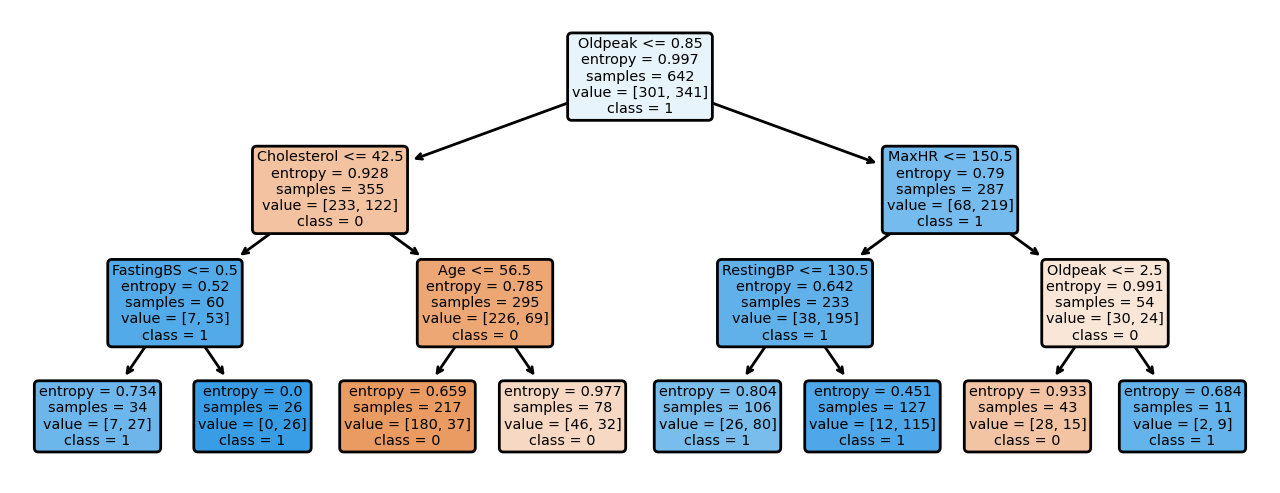

In [69]:
#plotting the new tree with greater accuracy
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('graphics/dectree2.png')

<h4>Breaking down the Decision Tree Model</h4>
<p> The following terminology is important to understand the findings of the model. The top of the tree (the light blue square on the top) is called the <b>root node</b>. Intermediate <b>nodes</b> have arrows pointing to and away from them. The left arrow shows if the top variable is true, and the right arrow shows if the top variable value is false. And lastly, the final row contains the <b>leaves</b>. Leaves tell you what class each sample belongs to.</p>

<h5> Breaking Down the Individual Values and Variables</h5>
<p> <b>Entropy</b> measures the impurity of the input set. Informatio gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.</p>
<p><b> Samples</b> shows the amount from the dataset that fits that criterion</p>
<h4> Evaluating Decision Tree by Confusion Matrix</h4>
<p> A <b>confusion matrix</b> is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct (true positive and true negatives) and incorrect predictions (false positives and false negatives) are summed up class-wise</p>

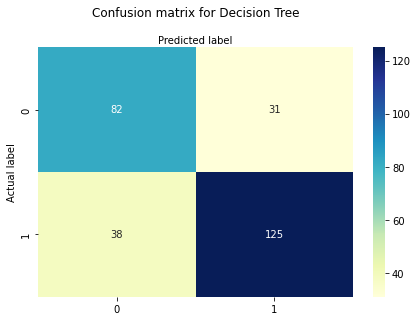

In [104]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#visualizing the confusion matrix through a heatmap

#import required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

#labeling heat map 
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('graphics/confusmat1.png')

<p>The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, <b>92</b> and <b>129</b> are actual predictions, and <b>17</b>  and <b>38</b> are incorrect predictions. So, the decision tree was an overall good model to show personality predictions of patients. </p>

In [71]:
#evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
#accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#precision score
print("Precision:",metrics.precision_score(y_test, y_pred))

#recall score
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8007246376811594
Precision: 0.8835616438356164
Recall: 0.7724550898203593


<p>classification rate of 80%, considered as a good accuracy. </p>
<p> Percision, how accurate is the model. In our prediction case, when your Logistic Regression model predicted patients are going to suffer from heart disease, that patients prediction will be correct 88% of the time.</p>
<p> Recall, If there are patients who have heart disease in the test set and your Logistic Regression model can identify it 77% of the time.</p>

In [72]:
#creating classification report 

#importing proper packages for the report
from sklearn.metrics import classification_report

#printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       109
           1       0.88      0.77      0.82       167

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276



<h4>Gradient Boosting Regression </h4>
<p> Gradient boosting algorithm can be used to train models for both regression and classification problem. Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value. </p>

In [106]:
#importing packages for gradient boosting regression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

<h5> Splitting the Data </h5>
<p> Similar to the decision tree, we need to split the data into trained and tested variables. In this iteration, we are splitting it 90% training and leaving the rest for testing. </p>

In [107]:
#split dataset in features and target variable
feature_cols = ['MaxHR','Age', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable

# Create Training and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 90% training and 10% test|#

# Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

<h5> Initilizing parameter for the GBR </h5>

In [108]:
# Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [109]:
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)

# Fit the model
gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [110]:
# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.442
The mean squared error (MSE) on test set: 0.1341


/Users/abbywillard/.local/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/abbywillard/.local/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


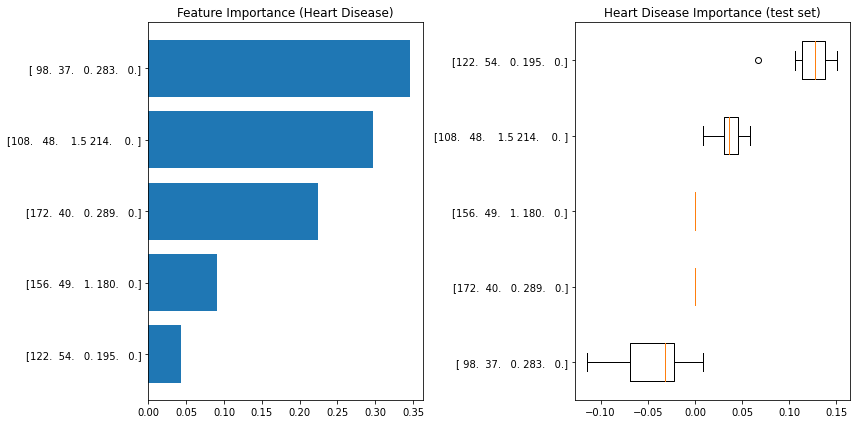

<Figure size 432x288 with 0 Axes>

In [111]:
from sklearn.inspection import permutation_importance

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(heart[feature_cols])[sorted_idx])
plt.title("Feature Importance (Heart Disease)")

result = permutation_importance(
    gbr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(heart[feature_cols])[sorted_idx],
)
plt.title("Heart Disease Importance (test set)")
fig.tight_layout()
plt.show()
plt.savefig('graphics/gbr.png')

<h5> GBR Inerpretation</h5>
<p> Because the accuracy of this regression was so low, it should not be regarded as a model to predict the heart disease variables</p>

<h4> Binary Logistic Regression</h4>

<h5> Assumptions Required for Successful Linear Regression</h5>
<p> binary logisitc regression requires the dependent variable to be binary. In this dataset, the dependent variable is Heart Disease with the binary 0 or 1. </p>
<p> to have a successful regression, only meaningful variables should be included. For this dataset, I will take the following to be meaningful variables
    <ul>
        <li>Sex</li>
        <li>Age</li>
        <li>RestingBP</li>
        <li>Old Peak</li>
        <li>Heart Disease</li></ul>
The variables should be independent of each other, here, the variables are. 
Logistic Regressions require large sample sizes. This dataset has 900+ observarions and so is large enough for such regression.</p>
     

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

train_data, test_data = train_test_split(heart, test_size = 0.2, random_state= 42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


/Users/abbywillard/opt/miniconda3/envs/geoenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
#split dataset in features and target variable
feature_cols = ['MaxHR','Age','RestingBP', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

formula = ('HeartDisease ~  MaxHR + Age + RestingBP + Oldpeak + Cholesterol + FastingBS')
model1 = logit(formula=formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.472598
         Iterations 6


In [88]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  734
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.3139
Time:                        18:40:38   Log-Likelihood:                -346.89
converged:                       True   LL-Null:                       -505.62
Covariance Type:            nonrobust   LLR p-value:                 1.481e-65
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1744      1.108      2.865      0.004       1.002       5.346
MaxHR          -0.0299      0.004     -6.832      0.000      -0.039      -0.021
Age             0.0075      0.012      0.649      0.516      -0.015       0.030
RestingBP       0.0042      0.005      0.785      0.433      -0.006       0.015
Oldpeak         1.0329      0.111      9.303      0.000       0.815       1.251
Cholesterol    -0.0045      0.001     -4.569      0.000      -0.006      -0.003
FastingBS       1.1519      0.249      4.623      0.000       0.663       1.640
===============================================================================
"""

In [89]:
#odds ratio table 
print(np.exp(model1.params))

Intercept      23.912222
MaxHR           0.970524
Age             1.007575
RestingBP       1.004219
Oldpeak         2.809295
Cholesterol     0.995492
FastingBS       3.164172
dtype: float64


<p>Mathematically, one can compute the odds ratio by taking exponent of the estimated coefficients. For example, in the below ODDS ratio table, you can observe that Fasting BS has an ODDS Ratio of <b>3.164</b>, which indicates that one unit increase in Fasting Blood sugar label increases the odds of having heart disease by <b>3.164</b> times. The two largest odds is the Oldpeak as well as Fasting BS</p>

<h5> Linear regression for Fasting Blood Sugar </h5>

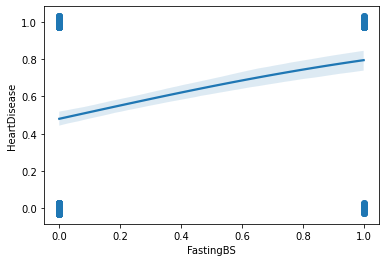

In [90]:
sns.regplot(x= "FastingBS", y = "HeartDisease",
           y_jitter = 0.03,
           data = heart,
           logistic = True)
plt.show()

<h5> Linear regression for Oldpeak </h5>

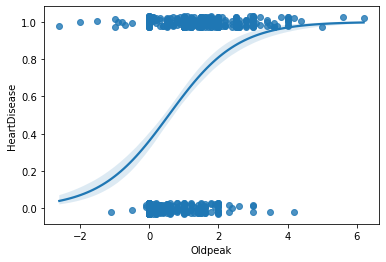

In [91]:
sns.regplot(x= "Oldpeak", y = "HeartDisease",
           y_jitter = 0.03,
           data = heart,
           logistic = True)
plt.show()

<h5> Evaluating regression </h5>
Confusion Matrix 

In [93]:
#creating confusion matrix 

#importing necessary package to create matrix
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 82  31]
 [ 38 125]]


<p> A <b>confusion matrix</b> is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct (true positive and true negatives) and incorrect predictions (false positives and false negatives) are summed up class-wise</p>

In [94]:
#evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
#accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#precision score
print("Precision:",metrics.precision_score(y_test, y_pred))

#recall score
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.75
Precision: 0.8012820512820513
Recall: 0.7668711656441718


<h4> ROC Curve and AUC Curve</h4>
<p>Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.</p>

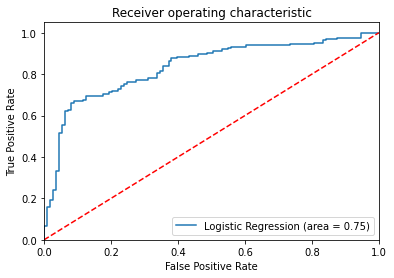

In [95]:
#creating ROC Curve
#importing necessary packages and libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#setting the ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()

#plotting the curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#labels for the curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h4> Interpretation</h4>
<p> The ROC (the receiver operating characteristic) curve is a common tool with binary classifiers. The red line represents the ROC curve of a purely random classifier. A good classifier stays as far away from the line as possible (as close to the top left corner as possible). </p>

<p> This shows that there is a relatively good true positive rate compared to the ROC curve</p>

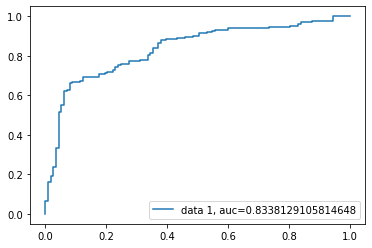

In [96]:
#auc classifier
#similar computation to ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#initializing auc score based on the y_test and y_prep_proba
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<p> here is the AUC score for this regerssion. An AUC score of 1 represents a perfect classifier. Here, our AUC score is 0.84, so our regression is a relatively good model </p>

<h3> Predictive Interpretation</h3>

<p> Because the Gradient Boosting Regression had such a low accuracy score, I will not do more with that anaylsis. However, because both the Decision tree and the Binary regression had an accuracy score of 80% and 75% respectively. </p>

<p> Because the decision tree has such a good accuracy score and confusion matrix, it, or some form of it, can be used by health care professionals. As for the binary regerssion, it helps show the weight of the patients attributes and determines which of those makes them more susceptible to acquirting a heart disease. As mentioned before, if fasting blood sugar is raised by 1 unit, it increases the likelihood of having heart disease raised by 3.16%. The fasting blood sugar variable is a boolean of 0 (less than 120 mg/L) and 1 (greater than or equal to 120 mg/L). Therefore, if an individuals blood sugar gets to the 120mg/L it increases their chances. Same as Oldpeak, as oldpeak, one unit increase of oldpeak increases likelihood of having heart disease by 2.8%. Lastly, our findings with age and heart rate stand true with what we found in our exploratory analysis. That as 1 unit increase of age icreases likelihood and that 1 unit increase of heart rate decreases the likelihood of heart disease (can be seen by a less than 1 ratio). </p>

<h3> Concluding Remarks</h3>

<p> As shown by the chest pain pairplot within our experimental analysis, one can't necessarily assume that chest pain ensures that they have a heart disease, as the majority of heart disease positive patients have asymptomatic pains. Because of that, it is integral that there should be public publications of predictive and exploratory findings so that patients can help self monitor their attribute values and check with the findings published.By analysing the experimental results, it is concluded that being older in age, being male, having an old peak of one, and a low heart rate all are physiological traits to heart disease positive individuals. This makes sense as older individuals tend to have health issues. Having a low heart rate also makes sense as maximum heart rate decreases as one gets older, as with the age variable. </p>

<p> With our prediction results, the tree technique turned out to be best classifier for heart disease prediction because it contains more accuracy and least total time to build. The tree has easy and clear to interpret and visualize. The second decision tree is a pruned model which was less complex, more explainable, and easy to understand than the previous decision tree model plot. The binary regression helps show the weight of each variable, and indicates that if the fasting blood sugar increases by one unit (blood sugar level reaches 120 mg/L), it increases the liklihood of having a heart disease by 3.16%. Therefore, one can interpret, based on their own attribute values, their 